# Standard Deviation
##You can see that in all cases, time required will go down upto 2 Processes and then it goes upwards because, the machine on which this code was written has 2 cores. 

In [7]:
import random
import statistics as st
import math as mt
import numpy as np
from multiprocessing import Process, Queue
MAX_NUM =10000000
NUMPROCS = 6
rand_nums = random.sample(range(1, MAX_NUM*10), MAX_NUM)
rand_nums = np.array(rand_nums)
print('SD calculation using Pythons libs {}'.format(np.std(rand_nums,ddof=1)))
print('Avg calculation using Pythons libs {}'.format(np.mean(rand_nums)))

#print('rand_nums array is divided into {} parts for {} processes'.format(NUMPROCS, NUMPROCS, mybounds))

SD calculation using Pythons libs 28862351.221436713
Avg calculation using Pythons libs 50005718.6309602


In [8]:
def sd_para(procs):
    NUMPROCS = procs
    mybounds = [i for i in range(0,MAX_NUM,int(MAX_NUM/NUMPROCS))]
    mybounds.append(MAX_NUM)
    #print(mybounds)
    def avg_of_range(start,stop,out_q):
            lcl_sum = 0
            lcl_sum = np.sum(rand_nums[start:stop])
            out_q.put(lcl_sum/MAX_NUM)

    sub_avgs = Queue()
    
    for i in range(0,NUMPROCS):
        #print i
        p = Process(target = avg_of_range, args = (mybounds[i],mybounds[i+1],sub_avgs))
        p.start()
        #p.join()
    
    #Fetch values from the QUEUE to calculate the final average.
    myfinal_avg = 0
    for i in range(0,NUMPROCS):
        myfinal_avg+=sub_avgs.get()
    #print('my avg using {} nodes is: {}'.format(NUMPROCS,myfinal_avg))

    def sd_of_range(start,stop,out_q,x_bar):
        lcl_sum_sqrs = 0
        diff = rand_nums[start:stop]-x_bar
        lcl_sum_sqrs = np.sum(diff*diff)
        out_q.put(lcl_sum_sqrs/MAX_NUM-1)

    sub_sds = Queue()

    #Dispatch work to NUMPROCS number of Processes.
    for i in range(0,NUMPROCS):
        p = Process(target = sd_of_range, args = (mybounds[i],mybounds[i+1],sub_sds,myfinal_avg))
        p.start()

    #Fetch values from the QUEUE to calculate the final average.
    myfinal_sd = 0
    for i in range(0,NUMPROCS):
        myfinal_sd+=sub_sds.get()
    myfinal_sd = np.sqrt(myfinal_sd)
    #print('my SD using {} nodes is: {}'.format(NUMPROCS,myfinal_sd))


In [9]:
##This cell is not used, just another way of doing the next cell
from timeit import default_timer as timer
times = []
for i in range(1,NUMPROCS):
    start = timer()
    sd_para(i)
    times.append((timer()-start)*1000)
print('times taken for each of the {} processes is {} in (ms)'.format(NUMPROCS,times))

times taken for each of the 6 processes is [151.59634900010133, 91.01370399912412, 100.22501200000988, 106.06130400083202, 131.07277099879866] in (ms)


In [20]:
## ACTUAL RESULTS
n = 1        # Number of loops
r = 10       # Number of repetitions of each loop
p = 6        # Display precision
times = []
for i in range(1,NUMPROCS):
    t2 = %timeit -n $n -r $r -p $p -o pass; func = sd_para(i)
    times.append(t2.average*1000)
#print('times taken for each of the {} processes is {} in (ms)'.format(NUMPROCS,times))
Sp = [times[0]/items for items in times]
Ep = [Sp[i]/(i+1) for i in range(0,len(Sp))]
import pandas as p
data = {}
for i in range(1,NUMPROCS):
    data['Processes='+str(i)] = [times[i-1],Sp[i-1],Ep[i-1],i]
df1 = p.DataFrame(data)
df1 = df1.rename(index={2: 'Ep',1:'Sp',0:'times',3:'Processes'})
print('Table showing timings, Efficiency, Speedup, times in (ms)')
print(df1.transpose())
df1=df1.transpose()

135.045 ms ± 4.59749 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
92.6686 ms ± 4.66264 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
103.903 ms ± 6.02439 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
111.575 ms ± 4.39404 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
129.457 ms ± 5.8942 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
Table showing timings, Efficiency, Speedup, times in (ms)
                  times        Sp        Ep  Processes
Processes=1  135.045206  1.000000  1.000000        1.0
Processes=2   92.668559  1.457293  0.728646        2.0
Processes=3  103.903151  1.299722  0.433241        3.0
Processes=4  111.574853  1.210355  0.302589        4.0
Processes=5  129.456833  1.043168  0.208634        5.0


Text(0,0.5,'log(time)')

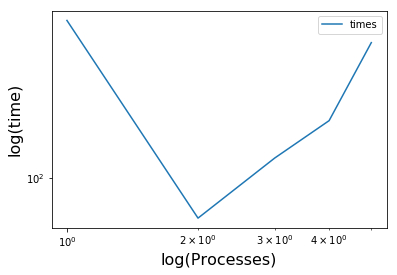

In [21]:
plt1 = df1.plot(x='Processes',y='times',logx=True, logy=True)
plt1.set_xlabel('log(Processes)',fontsize=16)
plt1.set_ylabel('log(time)',fontsize=16)

Text(0,0.5,'Ep')

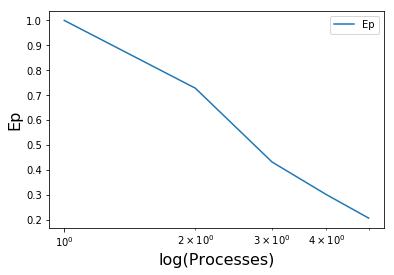

In [22]:
plt2 = df1.plot(x='Processes',y='Ep',logx=True, logy=False)
plt2.set_xlabel('log(Processes)',fontsize=16)
plt2.set_ylabel('Ep',fontsize=16)

In [23]:
## THEORETICAL RESULTS
#print(times)
time1= times[0]
times=[]
for i in range(1,NUMPROCS):
    times.append(time1/i)
Sp = [times[0]/items for items in times]
Ep = [Sp[i]/(i+1) for i in range(0,len(Sp))]
import pandas as p
data = {}
for i in range(1,NUMPROCS):
    data['Processes='+str(i)] = [times[i-1],Sp[i-1],Ep[i-1],i]
df1 = p.DataFrame(data)
df1 = df1.rename(index={2: 'Ep',1:'Sp',0:'times',3:'Processes'})
print('Table showing timings, Efficiency, Speedup, times in (ms)')
print(df1.transpose())
df1=df1.transpose()

Table showing timings, Efficiency, Speedup, times in (ms)
                  times   Sp   Ep  Processes
Processes=1  135.045206  1.0  1.0        1.0
Processes=2   67.522603  2.0  1.0        2.0
Processes=3   45.015069  3.0  1.0        3.0
Processes=4   33.761301  4.0  1.0        4.0
Processes=5   27.009041  5.0  1.0        5.0


Text(0,0.5,'log(time)')

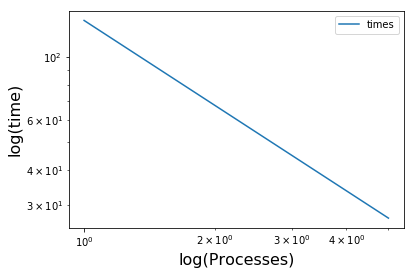

In [24]:
plt1 = df1.plot(x='Processes',y='times',logx=True, logy=True)
plt1.set_xlabel('log(Processes)',fontsize=16)
plt1.set_ylabel('log(time)',fontsize=16)

Text(0,0.5,'Ep')

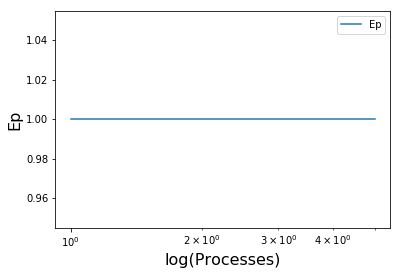

In [25]:
plt2 = df1.plot(x='Processes',y='Ep',logx=True, logy=False)
plt2.set_xlabel('log(Processes)',fontsize=16)
plt2.set_ylabel('Ep',fontsize=16)

# Minimum

In [1]:
import random
import statistics as st
import math as mt
import numpy as np
from multiprocessing import Process, Queue
MAX_NUM =10000000
NUMPROCS = 6
rand_nums = random.sample(range(1, MAX_NUM*10), MAX_NUM)
rand_nums = np.array(rand_nums)
print('Min calculation using Pythons libs {}'.format(rand_nums[np.argmin(rand_nums)]))


Min calculation using Pythons libs 1


In [2]:
def min_para(procs):
    NUMPROCS = procs
    mybounds = [i for i in range(0,MAX_NUM,int(MAX_NUM/NUMPROCS))]
    mybounds.append(MAX_NUM)

    def min_of_range(start,stop,out_q):
        lcl_min = 0
        lcl_min = rand_nums[start:stop][np.argmin(rand_nums[start:stop])]
        out_q.put(lcl_min)

    sub_mins = Queue()

    #Dispatch work to NUMPROCS number of Processes.
    for i in range(0,NUMPROCS):
        p = Process(target = min_of_range, args = (mybounds[i],mybounds[i+1],sub_mins))
        p.start()

    #Fetch values from the QUEUE to calculate the final average.
    myfinal_min = 0
    mins_list=[]
    for i in range(0,NUMPROCS):
        mins_list.append(sub_mins.get())
    mins_list = np.array(mins_list)
    myfinal_min = mins_list[np.argmin(mins_list)]
    #print('my min using {} nodes is: {}'.format(NUMPROCS,myfinal_min))


In [3]:
##PRACTICAL RESULTS
n = 1        # Number of loops
r = 10       # Number of repetitions of each loop
p = 6        # Display precision
times = []
for i in range(1,NUMPROCS):
    t3 = %timeit -n $n -r $r -p $p -o pass; func = min_para(i)
    times.append(t3.average*1000)
#print('times taken for each of the {} processes is {} in (ms)'.format(NUMPROCS,times))
Sp = [times[0]/items for items in times]
Ep = [Sp[i]/(i+1) for i in range(0,len(Sp))]
import pandas as p
data = {}
for i in range(1,NUMPROCS):
    data['Processes='+str(i)] = [times[i-1],Sp[i-1],Ep[i-1],i]
df2 = p.DataFrame(data)
df2 = df2.rename(index={2: 'Ep',1:'Sp',0:'times',3:'Processes'})
print('Table showing timings, Efficiency, Speedup, times in (ms)')
print(df2.transpose())
df2=df2.transpose()

20.9546 ms ± 2.2263 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
18.5897 ms ± 2.64609 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
22.1124 ms ± 2.0056 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
28.4947 ms ± 2.90287 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
30.4242 ms ± 2.63994 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
Table showing timings, Efficiency, Speedup, times in (ms)
                 times        Sp        Ep  Processes
Processes=1  20.954564  1.000000  1.000000        1.0
Processes=2  18.589651  1.127217  0.563608        2.0
Processes=3  22.112426  0.947638  0.315879        3.0
Processes=4  28.494673  0.735385  0.183846        4.0
Processes=5  30.424150  0.688748  0.137750        5.0


In [5]:
plt1 = df2.plot(x='Processes',y='times',logx=True, logy=True)
plt1.set_xlabel('log(Processes)',fontsize=16)
plt1.set_ylabel('log(time)',fontsize=16)

Text(0,0.5,'log(time)')

Text(0,0.5,'Ep')

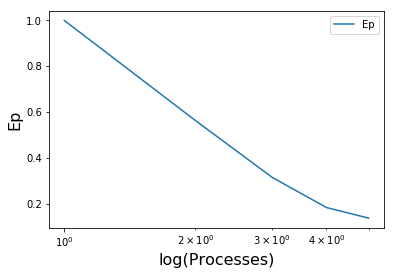

In [6]:
plt2 = df2.plot(x='Processes',y='Ep',logx=True, logy=False)
plt2.set_xlabel('log(Processes)',fontsize=16)
plt2.set_ylabel('Ep',fontsize=16)

In [10]:
##THEORETICAL RESULTS
time1= times[0]
times=[]
for i in range(1,NUMPROCS):
    times.append(time1/i)
Sp = [times[0]/items for items in times]
Ep = [Sp[i]/(i+1) for i in range(0,len(Sp))]
import pandas as p
data = {}
for i in range(1,NUMPROCS):
    data['Processes='+str(i)] = [times[i-1],Sp[i-1],Ep[i-1],i]
df2 = p.DataFrame(data)
df2 = df2.rename(index={2: 'Ep',1:'Sp',0:'times',3:'Processes'})
print('Table showing timings, Efficiency, Speedup, times in (ms)')
print(df2.transpose())
df2=df2.transpose()

Table showing timings, Efficiency, Speedup, times in (ms)
                 times   Sp   Ep  Processes
Processes=1  20.954564  1.0  1.0        1.0
Processes=2  10.477282  2.0  1.0        2.0
Processes=3   6.984855  3.0  1.0        3.0
Processes=4   5.238641  4.0  1.0        4.0
Processes=5   4.190913  5.0  1.0        5.0


Text(0,0.5,'log(time)')

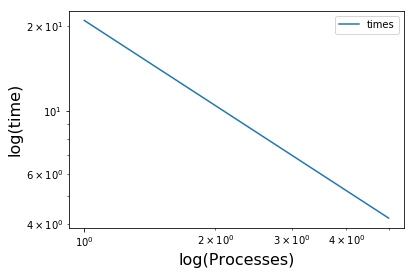

In [11]:
plt1 = df2.plot(x='Processes',y='times',logx=True, logy=True)
plt1.set_xlabel('log(Processes)',fontsize=16)
plt1.set_ylabel('log(time)',fontsize=16)

Text(0,0.5,'Ep')

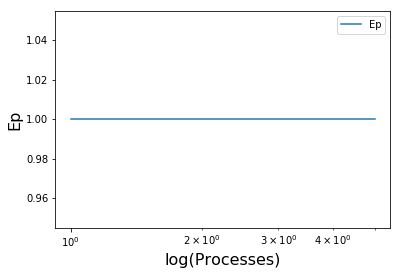

In [12]:
plt2 = df2.plot(x='Processes',y='Ep',logx=True, logy=False)
plt2.set_xlabel('log(Processes)',fontsize=16)
plt2.set_ylabel('Ep',fontsize=16)

# Maximum

In [1]:
import random
import statistics as st
import math as mt
import numpy as np
from multiprocessing import Process, Queue
MAX_NUM =10000000
NUMPROCS = 6
rand_nums = random.sample(range(1, MAX_NUM*10), MAX_NUM)
rand_nums = np.array(rand_nums)
print('Max calculation using Pythons libs {}'.format(rand_nums[np.argmax(rand_nums)]))


Max calculation using Pythons libs 99999995


In [2]:
def max_para(procs):
    NUMPROCS = procs
    mybounds = [i for i in range(0,MAX_NUM,int(MAX_NUM/NUMPROCS))]
    mybounds.append(MAX_NUM)

    def max_of_range(start,stop,out_q):
        lcl_max = 0
        lcl_max = rand_nums[start:stop][np.argmax(rand_nums[start:stop])]
        out_q.put(lcl_max)

    sub_maxs = Queue()

    #Dispatch work to NUMPROCS number of Processes.
    for i in range(0,NUMPROCS):
        p = Process(target = max_of_range, args = (mybounds[i],mybounds[i+1],sub_maxs))
        p.start()

    #Fetch values from the QUEUE to calculate the final average.
    myfinal_max = 0
    maxs_list=[]
    for i in range(0,NUMPROCS):
        maxs_list.append(sub_maxs.get())
    maxs_list = np.array(maxs_list)
    myfinal_max = maxs_list[np.argmax(maxs_list)]
    #print('my min using {} nodes is: {}'.format(NUMPROCS,myfinal_max))


In [3]:
## PRACTICAL RESULTS
n = 1        # Number of loops
r = 10       # Number of repetitions of each loop
p = 6        # Display precision
times = []
for i in range(1,NUMPROCS):
    t4 = %timeit -n $n -r $r -p $p -o pass; func = max_para(i)
    times.append(t4.average*1000)
#print('times taken for each of the {} processes is {} in (ms)'.format(NUMPROCS,times))
Sp = [times[0]/items for items in times]
Ep = [Sp[i]/(i+1) for i in range(0,len(Sp))]
import pandas as p
data = {}
for i in range(1,NUMPROCS):
    data['Processes='+str(i)] = [times[i-1],Sp[i-1],Ep[i-1],i]
df3 = p.DataFrame(data)
df3 = df3.rename(index={2: 'Ep',1:'Sp',0:'times',3:'Processes'})
print('Table showing timings, Efficiency, Speedup, times in (ms)')
print(df3.transpose())
df3=df3.transpose()

21.2448 ms ± 2.33819 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
18.3957 ms ± 1.97996 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
22.1096 ms ± 3.07032 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
26.1128 ms ± 2.41301 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
45.9694 ms ± 14.7929 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
Table showing timings, Efficiency, Speedup, times in (ms)
                 times        Sp        Ep  Processes
Processes=1  21.244772  1.000000  1.000000        1.0
Processes=2  18.395701  1.154877  0.577439        2.0
Processes=3  22.109648  0.960882  0.320294        3.0
Processes=4  26.112827  0.813576  0.203394        4.0
Processes=5  45.969405  0.462150  0.092430        5.0


Text(0,0.5,'log(time)')

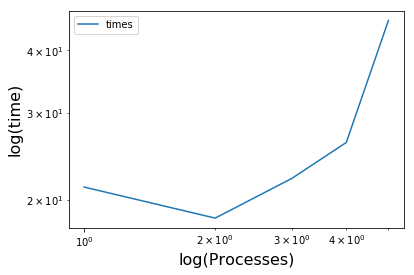

In [5]:
plt1 = df3.plot(x='Processes',y='times',logx=True, logy=True)
plt1.set_xlabel('log(Processes)',fontsize=16)
plt1.set_ylabel('log(time)',fontsize=16)

Text(0,0.5,'Ep')

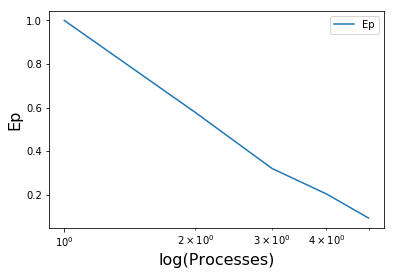

In [6]:
plt2 = df3.plot(x='Processes',y='Ep',logx=True, logy=False)
plt2.set_xlabel('log(Processes)',fontsize=16)
plt2.set_ylabel('Ep',fontsize=16)

In [7]:
##THEORETICAL RESULTS
time1= times[0]
times=[]
for i in range(1,NUMPROCS):
    times.append(time1/i)
Sp = [times[0]/items for items in times]
Ep = [Sp[i]/(i+1) for i in range(0,len(Sp))]
import pandas as p
data = {}
for i in range(1,NUMPROCS):
    data['Processes='+str(i)] = [times[i-1],Sp[i-1],Ep[i-1],i]
df3 = p.DataFrame(data)
df3 = df3.rename(index={2: 'Ep',1:'Sp',0:'times',3:'Processes'})
print('Table showing timings, Efficiency, Speedup, times in (ms)')
print(df3.transpose())
df3=df3.transpose()

Table showing timings, Efficiency, Speedup, times in (ms)
                 times   Sp   Ep  Processes
Processes=1  21.244772  1.0  1.0        1.0
Processes=2  10.622386  2.0  1.0        2.0
Processes=3   7.081591  3.0  1.0        3.0
Processes=4   5.311193  4.0  1.0        4.0
Processes=5   4.248954  5.0  1.0        5.0


Text(0,0.5,'log(time)')

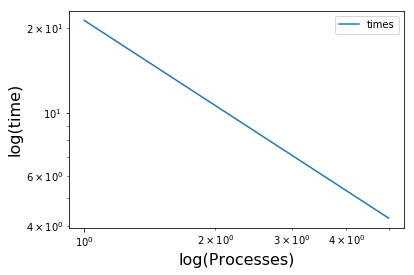

In [8]:
plt1 = df3.plot(x='Processes',y='times',logx=True, logy=True)
plt1.set_xlabel('log(Processes)',fontsize=16)
plt1.set_ylabel('log(time)',fontsize=16)

Text(0,0.5,'Ep')

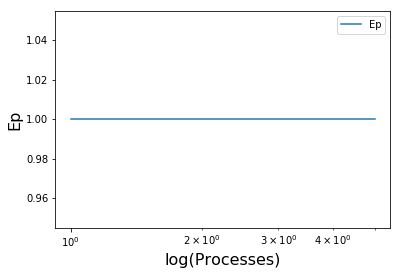

In [9]:
plt2 = df3.plot(x='Processes',y='Ep',logx=True, logy=False)
plt2.set_xlabel('log(Processes)',fontsize=16)
plt2.set_ylabel('Ep',fontsize=16)